In [18]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
cv = 1.000  # Consolidation coefficient in z-direction
Nz = 100  # Number of grid points in z-direction
Nt = 21600  # Number of time steps

z_range = np.linspace(0, 2, Nz)  # Grid points in z-direction
t_range = np.linspace(0, 1, Nt)  # Time range up to t=1.0

Delta_z = z_range[1] - z_range[0]  # Grid spacing
Delta_t = t_range[1] - t_range[0]  # Time step

# Initial condition
u_0 = 1.0  # Initial excess pore water pressure

# Initialize pore water pressure array
u = np.zeros((len(z_range), len(t_range)))

# Apply initial condition
u[:, 0] = u_0

# Start time for progress tracking
start_time = time.time()

# Time-stepping loop
for n in range(0, len(t_range) - 1):
    for k in range(1, len(z_range) - 1):
        u[k, n + 1] = u[k, n] + cv * Delta_t * (
            (u[k + 1, n] - 2 * u[k, n] + u[k - 1, n]) / Delta_z**2
        )

    # Apply boundary conditions for the 1D Terzaghi problem
    u[-1, n + 1] = 0  # u(t, 2) = 0
    u[0, n + 1] = 0  # u(t, 0) = 0
    
    # Print progress every 1000 time steps
    if (n + 1) % 5000 == 0:
        elapsed_time = time.time() - start_time
        remaining_time = elapsed_time * (len(t_range) - n - 1) / (n + 1)
        progress_message = f"Time step {n + 1}/{len(t_range) - 1} completed. Estimated time remaining: {remaining_time:.2f} seconds"
        print(progress_message)

Time step 1000/21599 completed. Estimated time remaining: 1.98 seconds
Time step 2000/21599 completed. Estimated time remaining: 1.83 seconds
Time step 3000/21599 completed. Estimated time remaining: 1.77 seconds
Time step 4000/21599 completed. Estimated time remaining: 1.66 seconds
Time step 5000/21599 completed. Estimated time remaining: 1.57 seconds
Time step 6000/21599 completed. Estimated time remaining: 1.47 seconds
Time step 7000/21599 completed. Estimated time remaining: 1.37 seconds
Time step 8000/21599 completed. Estimated time remaining: 1.27 seconds
Time step 9000/21599 completed. Estimated time remaining: 1.18 seconds
Time step 10000/21599 completed. Estimated time remaining: 1.08 seconds
Time step 11000/21599 completed. Estimated time remaining: 0.99 seconds
Time step 12000/21599 completed. Estimated time remaining: 0.90 seconds
Time step 13000/21599 completed. Estimated time remaining: 0.81 seconds
Time step 14000/21599 completed. Estimated time remaining: 0.71 seconds
T

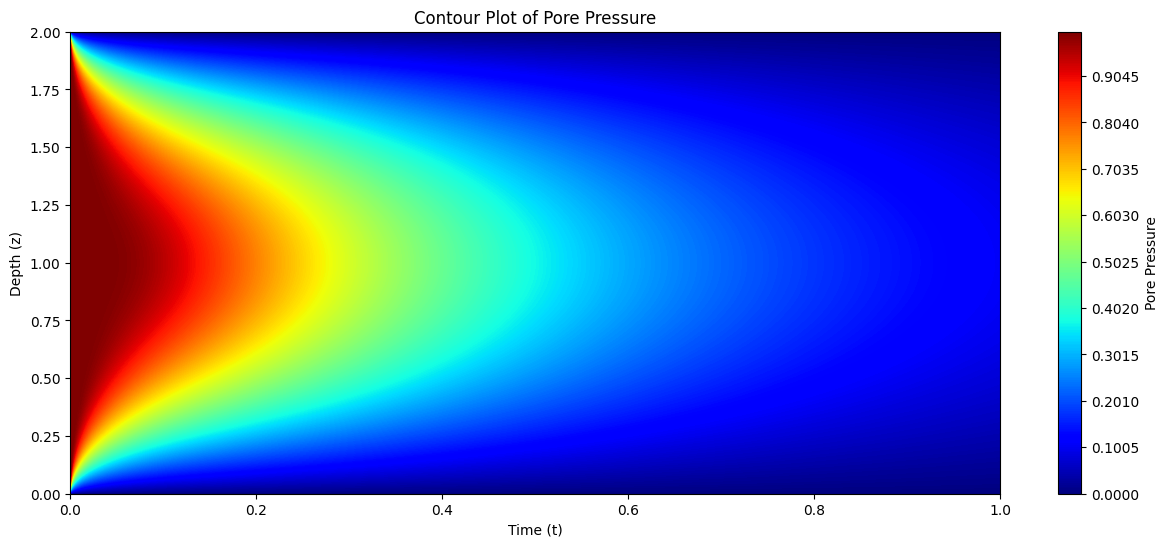

In [19]:
# Function to plot contour plot
def plot_contour():
    fig, ax = plt.subplots(figsize=(15, 6))
    
    # Prepare the mesh grid for contour plotting
    T, Z = np.meshgrid(t_range, z_range, indexing='ij')
    
    # Create a contour plot
    contour = ax.contourf(T, Z, u.T/u_0, cmap='jet', levels=950, vmin=0, vmax=1)
    
    ax.set_xlabel('Time (t)')
    ax.set_ylabel('Depth (z)')
    ax.set_title('Contour Plot of Pore Pressure')
    
    # Adding a color bar to indicate pressure levels
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label('Pore Pressure')
    plt.savefig(f'ContourPlot_1D.png', dpi=600)
    plt.show()

# Plot contour plot
plot_contour()